## **EDA Análisis exploratorio de los datos: Regresión Lineal** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [3]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [55]:
df.head(3)

Período  Tenencia Suerte       Suelo  Area Neta  Dist Km   Variedad  \
0        1      51.0   002A   CANTARINA       6.00      4.3    CC85-92   
1        1      81.0   039B         NaN       1.45      NaN    CC85-92   
2        1      31.0    007  CORINTIAS        8.24     23.0  CC01-1228   

   Cod.Estado # Cod.Estado  F.Siembra  ... Humedad Rel Media Ciclo  \
0             5    Corte 5 2010-08-20  ...                     NaN   
1             5    Corte 5 2011-01-27  ...                     NaN   
2             4    Corte 4 2011-10-25  ...                     NaN   

  Oscilacion Temp Med 0-3  Oscilacion Temp Ciclo Radicion Solar 0-3  \
0                     NaN                    NaN                NaN   
1                     NaN                    NaN                NaN   
2                     NaN                    NaN                NaN   

   Radiacion Solar Ciclo  Precipitacion 0_3 Precipitacion Ciclo  \
0                    NaN                NaN                 NaN   
1                    NaN                NaN                 NaN   
2                    NaN                NaN                 NaN   

  Evaporacion 0-3 Evaporacion Ciclo  Período_Mes  
0             NaN               NaN            1  
1             NaN               NaN            1  
2             NaN               NaN            1  

[3 rows x 80 columns]

---
## **Limpieza y preparación de datos**

#### **Data Leakage**
Se identifican variables no relevantes relacionadas con información de las haciendas. 

In [5]:
DATA_LEAKAGE = ['Hacienda', 'Nombre', 'Zona', 'Codigo Estacion']
df = df.drop(columns = DATA_LEAKAGE)

#### **Datos Nulos**
Se extraen porcentajes de nulos para identificar features a eliminar, a imputar y si existen similitudes entre las mismas. 

In [6]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Sum Oscilacion Temp Ciclo    100.000000
Fert.Nitrogen.               100.000000
Urea 46%                      96.561564
NITRAX-S                      96.442669
MEZ                           95.382128
MicroZinc                     94.535597
Boro Granul.                  93.888810
Sul.Amonio                    93.546393
NITO_XTEND                    82.503448
Vinaza                        80.510772
Temp. Media Ciclo             78.456271
Temp. Media 0-3               78.456271
Humedad Rel Media Ciclo       78.456271
Humedad Rel Media 0-3         78.456271
Temp Min Ciclo                78.456271
Temp Max Ciclo                78.456271
Evaporacion Ciclo             78.456271
Radiacion Solar Ciclo         78.456271
Evaporacion 0-3               78.456271
Precipitacion Ciclo           78.456271
Precipitacion 0_3             78.456271
Oscilacion Temp Ciclo         78.456271
Radicion Solar 0-3            78.456271
Oscilacion Temp Med 0-3       78.456271
%Infest.Diatrea               73.367575


#### **Columnas Vacías**

Eliminamos columnas vacías del Df


In [56]:
COLUMNS_TO_DROP = ['Sum Oscilacion Temp Ciclo', 'Fert.Nitrogen.']
df = df.drop(columns = COLUMNS_TO_DROP)

KeyError: "['Sum Oscilacion Temp Ciclo', 'Fert.Nitrogen.'] not found in axis"

#### **Chem Features**

Se observan columnas con porcentajes de nulos demasiado altos [99% - 80%]. Parecen columnas relacionadas a productos o químicos que se utilizaron en la plantación, su ausencia podría indicar que el producto no se usó. Se imputarán con 0's. 


In [8]:
CHEM_FEATURES = ['Urea 46%', 'NITRAX-S', 'MEZ', 'NITO_XTEND', 'Vinaza', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio']
df[CHEM_FEATURES] = df[CHEM_FEATURES].fillna(0)

#### **Weather Features - Variables Climaticas**
Se observa un porcentaje en comun con variables relacionadas con condiciones climáticas (78.456271%) por esa razón, se procede a agruparlas en la categoría de weather features

In [ ]:
WEATHER_FEATURES = ['Humedad Rel Media Ciclo', 'Temp. Media 0-3', 'Oscilacion Temp Med 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Humedad Rel Media 0-3 ', 'Radiacion Solar Ciclo', 'Evaporacion 0-3', 'Precipitacion Ciclo', 'Evaporacion Ciclo', 'Temp Min Ciclo', 'Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Precipitacion 0_3']

Al revisar el dataset, se observa que existen variables del clima como radiación solar, ciclos de evaporación, entre otros, que comparten el mismo porcentaje de nulos, al revisar los campos no nulos se observa que solo se tienen registros de estas variables desde el periodo 202202 hasta 202407, teniendo un total de 4.530 de 20.027 que habían originalmente.  

Se propone realizar un análisis de este subset de 4.530 registros al igual que otro análisis del dataset completo. 

In [57]:
df_filtered_weather = df.dropna(subset=WEATHER_FEATURES, how="any")

In [58]:
df_filtered_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4530 entries, 13972 to 21026
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Período                  4530 non-null   int64         
 1   Tenencia                 4530 non-null   float64       
 2   Suerte                   4530 non-null   object        
 3   Suelo                    4328 non-null   object        
 4   Area Neta                4530 non-null   float64       
 5   Dist Km                  4530 non-null   float64       
 6   Variedad                 4530 non-null   object        
 7   Cod.Estado #             4530 non-null   int64         
 8   Cod.Estado               4530 non-null   object        
 9   F.Siembra                4530 non-null   datetime64[ns]
 10  D.S.                     2062 non-null   object        
 11  Ult.Riego                1942 non-null   datetime64[ns]
 12  Edad Ult Cos             4530 non-

In [59]:
nulls = df_filtered_weather.isnull().sum()
nulls = nulls[nulls > 0].sort_values(ascending=False)

print("Columnas con nulos después de filtrar climáticos:\n")
print(nulls)

Columnas con nulos después de filtrar climáticos:

Edad.Precosecha        4517
%Infest.Diatrea        2952
Num.Riegos             2589
Ult.Riego              2588
D.S.                   2468
Semanas mad.           2305
Fec.Madur.             2305
Producto               2305
%AR Jugo                382
%Fibra Caña             310
%ME Veg                 310
%ME Min                 310
Fosfato Jugo            310
%ME Tot                 310
%Sac.Muestreadora       310
Vejez                   234
Suelo                   202
%ATR                    172
KATRHM                  172
%Sac.Caña               157
Pureza                   86
Rdto                     86
Brix                     86
Ton.Azucar               77
TAH                      77
TAHM                     77
Dosis Madurante           8
Sac.Caña Precosecha       5
dtype: int64


In [60]:
numeric_df = df_filtered_weather.select_dtypes(include=['float64', 'int64'])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4530 entries, 13972 to 21026
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Período                  4530 non-null   int64  
 1   Tenencia                 4530 non-null   float64
 2   Area Neta                4530 non-null   float64
 3   Dist Km                  4530 non-null   float64
 4   Cod.Estado #             4530 non-null   int64  
 5   Edad Ult Cos             4530 non-null   float64
 6   Destino 1=Semilla        4530 non-null   int64  
 7   Cod. T.Cultivo           4530 non-null   float64
 8   Dosis Madurante          4522 non-null   float64
 9   Semanas mad.             2225 non-null   float64
 10  TonUltCorte              4530 non-null   float64
 11  TCH                      4530 non-null   float64
 12  TCHM                     4530 non-null   float64
 13  Ton.Azucar               4453 non-null   float64
 14  Rdto                    

In [37]:
numeric_df['Período_Mes'] = numeric_df['Período'].astype(str).str[-2:].astype(int)

In [38]:
numeric_df = numeric_df.drop(columns =['Período'])

In [39]:
numeric_df['Período_Mes'].value_counts()

Período_Mes
3     533
6     468
4     458
8     435
7     422
2     380
5     368
9     351
1     317
12    307
10    284
11    207
Name: count, dtype: int64

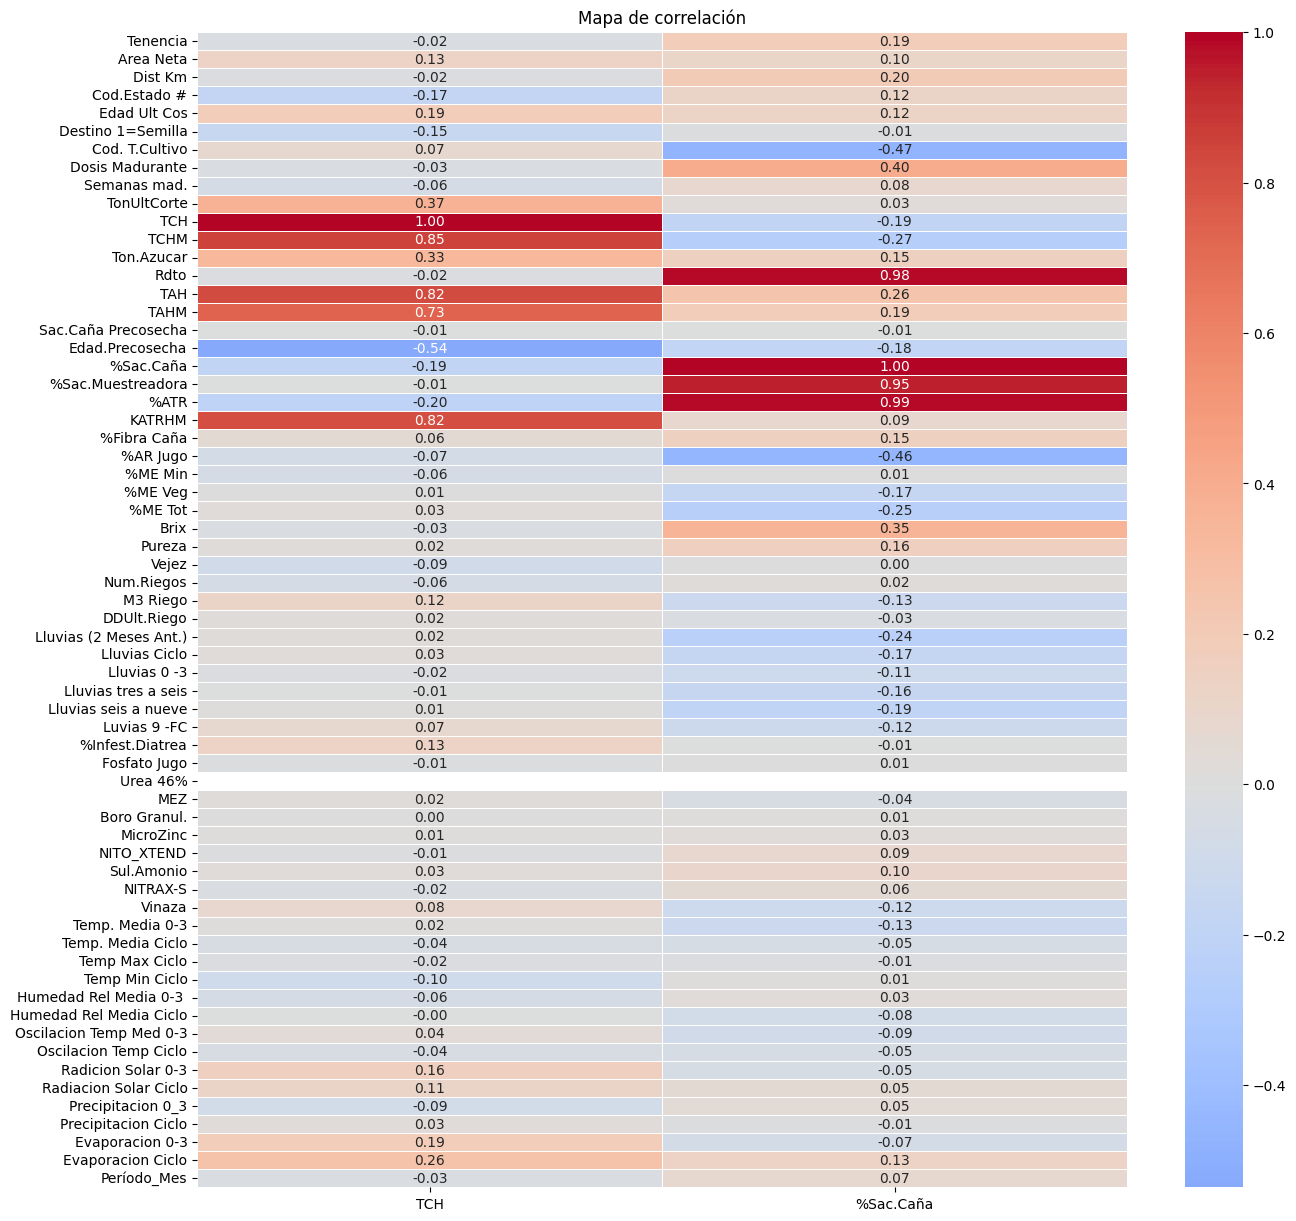

In [50]:
corr = numeric_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr[TARGET], 
            annot=True,      # Muestra los valores de correlación
            cmap="coolwarm", # Colormap
            center=0,        # Centro del mapa en 0
            fmt=".2f",       # Formato de números
            linewidths=0.5)  # Líneas entre celdas

plt.title("Mapa de correlación")
plt.show()

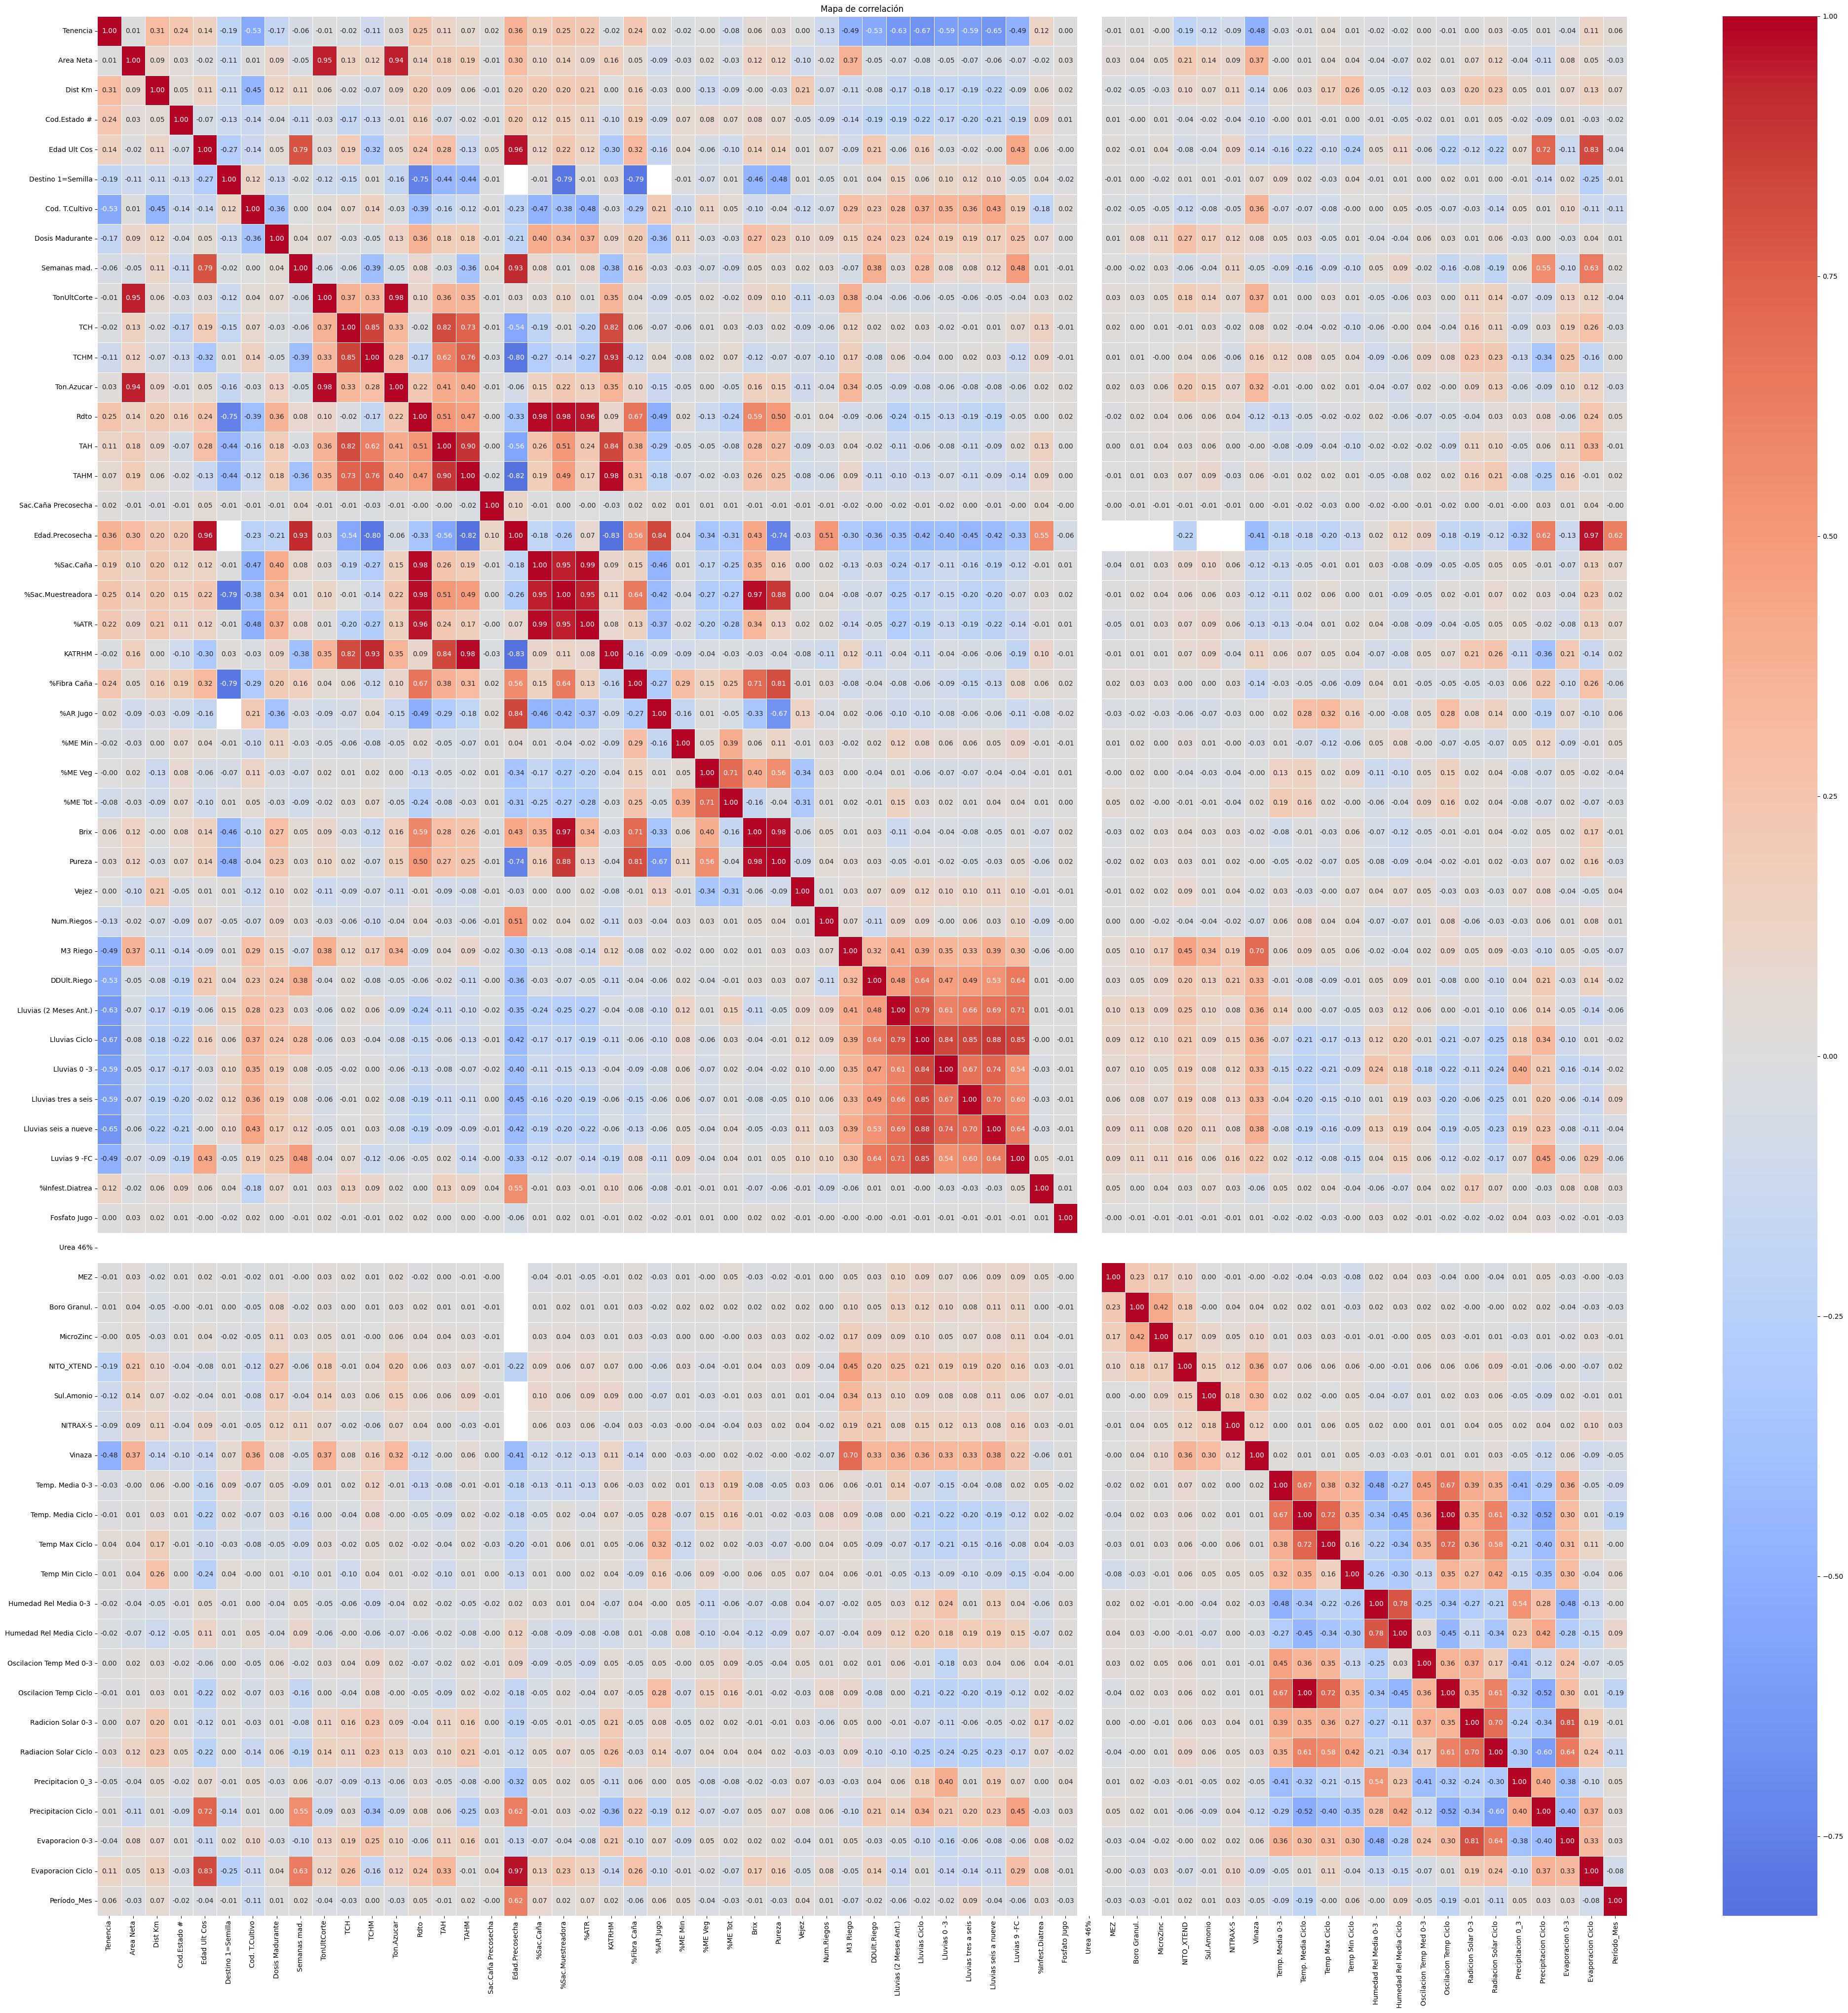

In [49]:
plt.figure(figsize=(50,50))
sns.heatmap(corr, 
            annot=True,      # Muestra los valores de correlación
            cmap="coolwarm", # Colormap
            center=0,        # Centro del mapa en 0
            fmt=".2f",       # Formato de números
            linewidths=0.5)  # Líneas entre celdas

plt.title("Mapa de correlación")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Período                  21027 non-null  int64  
 1   Tenencia                 21026 non-null  float64
 2   Area Neta                21027 non-null  float64
 3   Dist Km                  21022 non-null  float64
 4   Cod.Estado #             21027 non-null  int64  
 5   Edad Ult Cos             21027 non-null  float64
 6   Destino 1=Semilla        21027 non-null  int64  
 7   Cod. T.Cultivo           21025 non-null  float64
 8   Dosis Madurante          20923 non-null  float64
 9   Semanas mad.             11252 non-null  float64
 10  TonUltCorte              21027 non-null  float64
 11  TCH                      21027 non-null  float64
 12  TCHM                     21027 non-null  float64
 13  Ton.Azucar               20786 non-null  float64
 14  Rdto                  

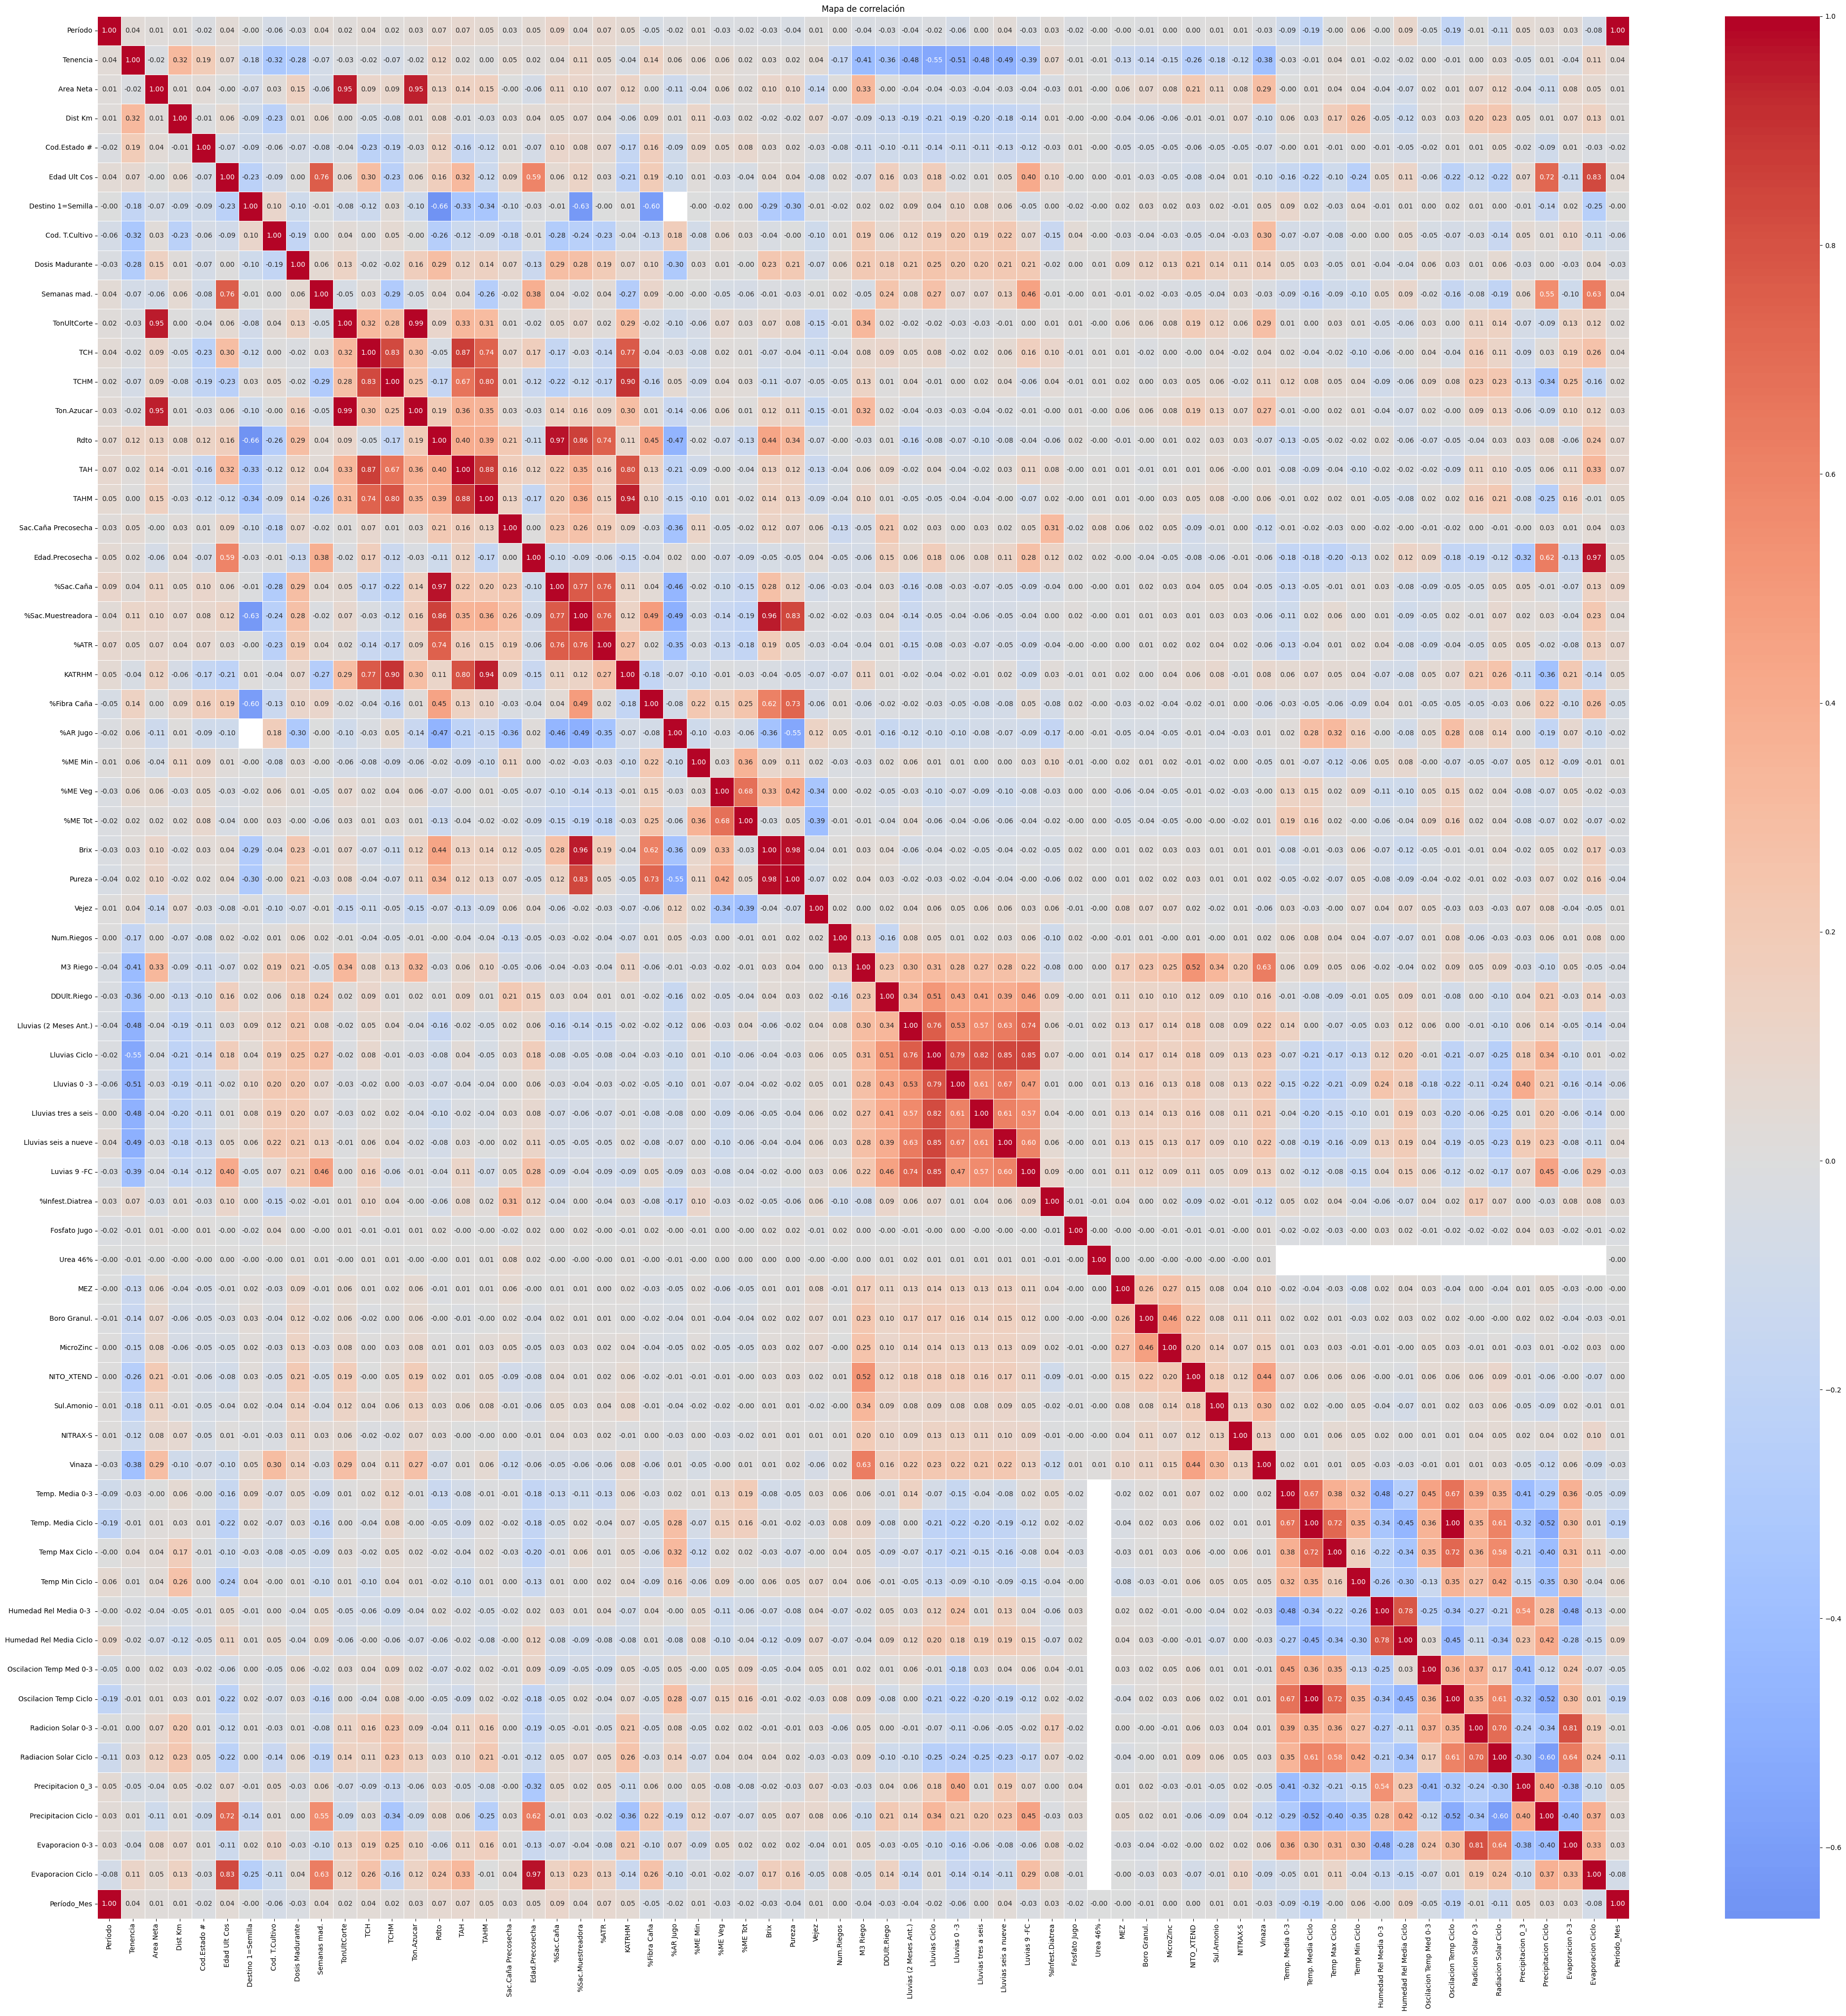

In [54]:
numeric_df_gen = df.select_dtypes(include=['float64', 'int64'])
numeric_df_gen_corr = numeric_df_gen.corr()

print(numeric_df_gen.info())
plt.figure(figsize=(50,50))
sns.heatmap(numeric_df_gen_corr, 
            annot=True,      # Muestra los valores de correlación
            cmap="coolwarm", # Colormap
            center=0,        # Centro del mapa en 0
            fmt=".2f",       # Formato de números
            linewidths=0.5)  # Líneas entre celdas

plt.title("Mapa de correlación")
plt.show()
